In [1]:
# importing libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import re

In [2]:
# loading data by using glob  & loop & concatenation all csv files
files = glob("states*")
us_census = pd.concat((pd.read_csv(file) for file in files ),ignore_index=True)
del us_census["Unnamed: 0"]

In [3]:
# look .dtypes and .columns
d_types=us_census.dtypes
print("Data types of us_census : \n",d_types)
print('___________________________________')
col= us_census.columns
print("Column of us_census : \n",col)

Data types of us_census : 
 State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object
___________________________________
Column of us_census : 
 Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [4]:
# task 4 : look at the Data head Frame dtypes 
us_census.head(2).dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [5]:
us_census["Income"]=us_census["Income"].replace("\$"," ",regex=True)
us_census['Income'] = us_census['Income'].astype("float")
print("After conversion the Data type of income columns is  : ",us_census['Income'].dtypes)


After conversion the Data type of income columns is  :  float64


In [6]:
#us_census['Income']=us_census['Income'].replace('[/$]',"",regex=True)
#us_census['Income'] = pd.to_numeric(us_census['Income'])
#print(us_census.dtypes)

In [7]:
#us_census["Income"]
us_census['GenderPop'][0]

'2341093M_2489527F'

In [8]:
split_gender = us_census['GenderPop'].str.split('_', expand=True)
us_census["female"]=split_gender[1].str.extract('(\d+)',expand=True)
us_census["female"]=pd.to_numeric(us_census["female"])
us_census["Male"]=split_gender[0].str.extract('(\d+)',expand=True)
us_census["Male"]=pd.to_numeric(us_census["Male"])
us_census["female"]

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23           NaN
24           NaN
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31           NaN
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [9]:
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
female       float64
Male           int64
dtype: object

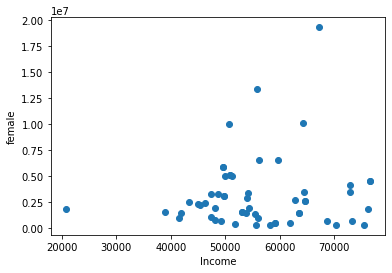

In [10]:

x=us_census["Income"]
y=us_census["female"]
plt.scatter(x,y)
plt.xlabel("Income")
plt.ylabel("female")
plt.show()

In [11]:
female_na_values = us_census["female"][us_census["female"].isnull()]
print(female_na_values)

23   NaN
24   NaN
31   NaN
Name: female, dtype: float64


In [12]:
total_pop=us_census["TotalPop"]-us_census["Male"]
us_census['female']=us_census['female'].fillna(value= total_pop)
us_census['female'].isnull().any()

False

In [13]:
#duplicated_row
duplicated_row = us_census[us_census.duplicated()]

In [14]:
# drop these Duplicated row
us_census.drop_duplicates(inplace=True)
us_census.duplicated()


0     False
1     False
2     False
3     False
4     False
5     False
7     False
8     False
9     False
10    False
11    False
13    False
14    False
15    False
16    False
17    False
19    False
20    False
21    False
22    False
23    False
25    False
26    False
27    False
28    False
29    False
31    False
32    False
33    False
34    False
35    False
37    False
38    False
39    False
40    False
41    False
43    False
44    False
45    False
46    False
47    False
49    False
50    False
51    False
52    False
53    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

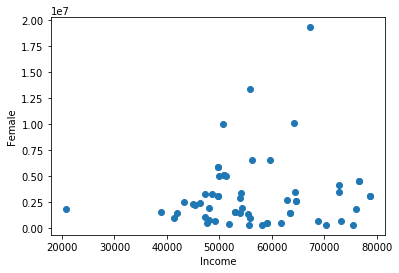

In [15]:
plt.scatter(x,y)
plt.xlabel("Income")
plt.ylabel("Female")
plt.show()

In [16]:
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
female       float64
Male           int64
dtype: object

In [17]:
us_census = us_census.replace('%*','',regex=True)
us_census[["Hispanic","White","Black","Native","Asian","Pacific"]] =us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].apply(pd.to_numeric)

In [18]:
us_census.dtypes

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
female       float64
Male           int64
dtype: object

In [27]:
us_census = us_census.fillna(method="ffill")
us_census.isnull().any()

State        False
TotalPop     False
Hispanic     False
White        False
Black        False
Native       False
Asian        False
Pacific      False
Income       False
GenderPop    False
female       False
Male         False
dtype: bool

In [29]:
us_census.duplicated().any()

False

(array([3., 3., 3., 3.]),
 array([ 0.  ,  2.75,  5.5 ,  8.25, 11.  ]),
 <a list of 4 Patch objects>)

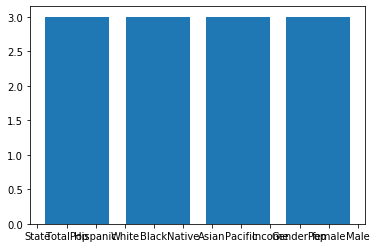

In [40]:
plt.hist(us_census.columns,bins= 4, rwidth=.80)